In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
iris = sns.load_dataset("iris")

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

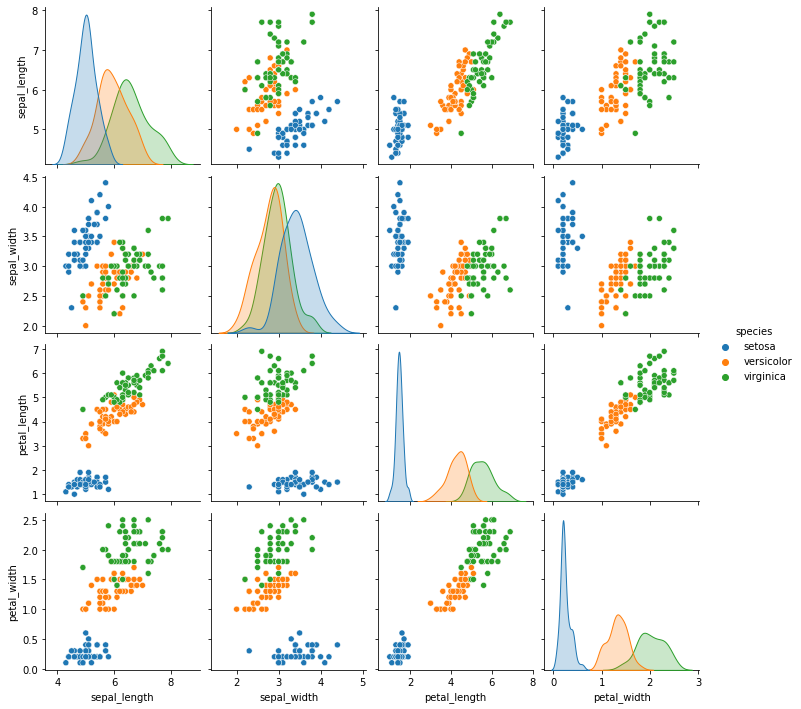

In [8]:
sns.pairplot(iris, hue="species")

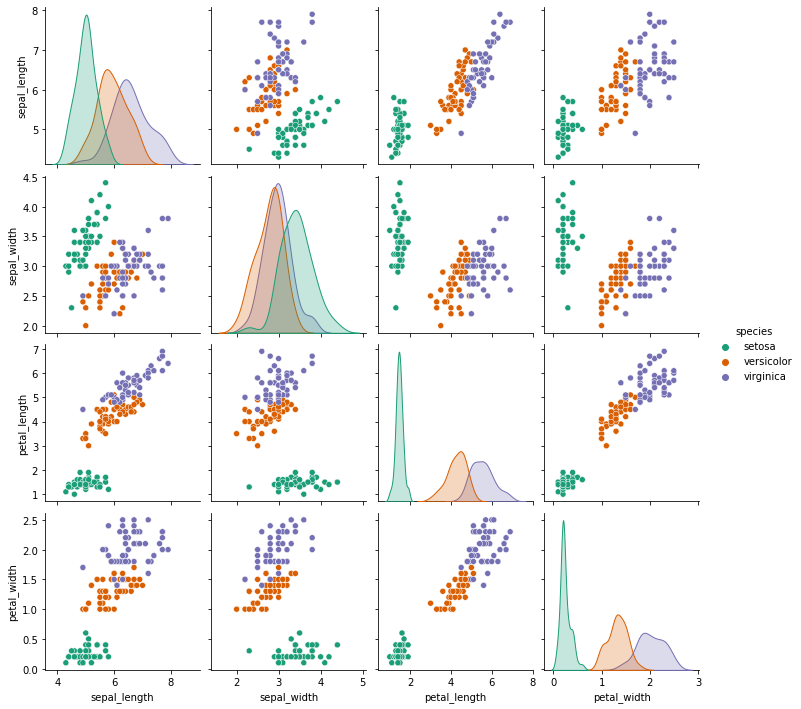

In [9]:
sns.pairplot(iris, hue="species", palette="Dark2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


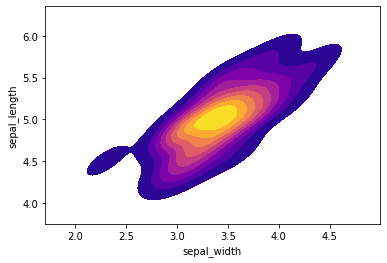

In [12]:
setosa = iris[iris["species"] == "setosa"]
sns.kdeplot(setosa["sepal_width"], setosa["sepal_length"], 
            cmap="plasma", shade=True)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = iris.drop("species", axis=1)
y = iris["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
from sklearn.svm import SVC

In [16]:
svm = SVC()

In [17]:
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
predictions = svm.predict(X_test)

In [19]:
predictions

array(['setosa', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor'],
      dtype=object)

In [21]:
len(predictions)

45

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))

[[ 9  0  0]
 [ 0 20  1]
 [ 0  0 15]]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.95      0.98        21
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [25]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {"C":[0.1,1,10,100,1000], "gamma":[1,0.1,0.01,0.001,0.0001]}

In [33]:
grid = GridSearchCV(SVC(), param_grid, verbose=2)

In [34]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [35]:
grid_predictions = grid.predict(X_test)

In [36]:
grid_predictions

array(['setosa', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor'],
      dtype=object)

In [37]:
print(confusion_matrix(y_test, grid_predictions))
print()
print(classification_report(y_test, grid_predictions))

[[ 9  0  0]
 [ 0 20  1]
 [ 0  1 14]]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.95      0.95      0.95        21
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

